## Этап 1. Импортирование данных и подготовка их к анализу

### 1.1 Импортирование библиотек

Импортируем необходимые библиотеки для нашей работы:

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

### 1.2 Чтение файлов и знакомство с данными

Прочитаем нужные для работы датасеты и сохраним их в переменные **visits**, **orders**, **costs**:

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Рассмотрим каждый датасет в дальнейшем более подробно.

#### 1.2.1 visits

Данный датасет хранит лог сервера с информацией о посещениях сайта. Посмотрим на первые 5 строк датасета:

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Здесь встречаются такие столбцы как:
* Device — категория устройства пользователя
* End Ts — дата и время окончания сессии
* Source Id — идентификатор источника перехода на сайт
* Start Ts — дата и время начала сессии
* Uid — уникальный идентификатор пользователя

Для удобства работы сразу изменим регистр столбцов на нижний, также избавившись от пробелов:

In [4]:
visits.columns = visits.columns.str.replace(' ', '_').str.lower()

Вызовем общую информацию и познакомимся с типами данных:

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null object
source_id    359400 non-null int64
start_ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


Для **end_ts** и **start_ts** необходимо изменить тип данных на временной:

In [6]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

Проверим встречаются ли явные дубликаты:

In [7]:
visits.duplicated().sum()

0

Явных дубликатов нет.

#### 1.2.2 orders

Данный датасет хранит информацию о заказах. Посмотрим на 5 случайных строк датасета:

In [8]:
orders.sample(5)

,Buy Ts,Revenue,Uid
19528,2017-11-24 17:54:00,1.28,4583184467965552733
30056,2018-01-19 13:16:00,4.89,2324790312959910225
17682,2017-11-15 17:01:00,1.47,10276693901773963495
45081,2018-04-22 18:10:00,2.81,6731421022966725351
47225,2018-05-14 13:17:00,1.75,12493013458214094372


Здесь встречаются такие столбцы как:
* Uid — уникальный идентификатор пользователя
* Buy Ts — дата и время заказа
* Revenue — сумма заказа

Для удобства работы сразу изменим регистр столбцов на нижний, также избавившись от пробелов:

In [9]:
orders.columns = orders.columns.str.replace(' ', '_').str.lower()

Вызовем общую информацию и познакомимся с типами данных:

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


Для **buy_ts** изменим тип данных на временной:

In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

Проверим встречаются ли явные дубликаты:

In [12]:
orders.duplicated().sum()

0

Явных дубликатов нет.

#### 1.2.3 costs

Данный датасет содержит информацию о расходах на маркетинг. Посмотрим на 5 последних датасета:

In [13]:
costs.tail()

,source_id,dt,costs
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15
2541,10,2018-05-31,17.60


Здесь встречаются такие столбцы как:
* source_id — идентификатор рекламного источника
* dt — дата проведения рекламной кампании
* costs — расходы на эту кампанию

Вызовем общую информацию и познакомимся с типами данных:

In [14]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


Для **dt** изменим тип данных на временной:

In [15]:
costs['dt'] = pd.to_datetime(costs['dt'])

Проверим встречаются ли явные дубликаты:

In [16]:
costs.duplicated().sum()

0

In [17]:
visits.isnull().sum().sort_values() / visits.shape[0] * 100 

device      0.00
end_ts      0.00
source_id   0.00
start_ts    0.00
uid         0.00
dtype: float64

In [18]:
orders.isnull().sum().sort_values() / orders.shape[0] * 100 

buy_ts    0.00
revenue   0.00
uid       0.00
dtype: float64

In [19]:
costs.isnull().sum().sort_values() / costs.shape[0] * 100 

source_id   0.00
dt          0.00
costs       0.00
dtype: float64

Изменим тип данных в **device** на категорильный тип данных:

In [20]:
#visits['device'] = visits['device'].astype('category')

Посмотрим как распределены данные:

In [21]:
visits['device'].value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

desktop, включающий в себя компьютеры имеет 262567 строк. touch, включающий в себя устройства, предполагающие использования тача, например смартфоны и планшеты, включает в себя 96833 строк.

Изменим тип данных в **source_id** на категорильный тип данных:

In [22]:
costs['source_id'] = costs['source_id'].astype('category')

In [23]:
#visits['source_id'] = visits['source_id'].astype('category')

Также проверим соответствуют ли данные временному интерваллу с июня 2017 по конец мая 2018 года:

Посмотрим на время начала сессии:

In [24]:
visits['start_ts'].describe()

count                  359400
unique                 224303
top       2017-11-24 16:06:00
freq                       19
first     2017-06-01 00:01:00
last      2018-05-31 23:59:00
Name: start_ts, dtype: object

Все в пределах наших значений. Проверим также конец сессии посещения :

In [25]:
visits['end_ts'].describe()

count                  359400
unique                 224760
top       2017-11-24 16:51:00
freq                       23
first     2017-06-01 00:02:00
last      2018-06-01 01:26:00
Name: end_ts, dtype: object

Обратим внимание, что последнее значение выходит на 1 час 26 минут за наш интервал, но так как целям задачи не мешает, оставим без изменений.

Проверим теперь время в затратах :

In [26]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Все в порядке. Также проверим датасет с заказами:

In [27]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

Данное значение выходит на 2 минуты за заданный интервал, посмотрим много ли таких значений:

In [28]:
orders['buy_ts'].sort_values(ascending = False).head(5)

50414   2018-06-01 00:02:00
50413   2018-05-31 23:56:00
50412   2018-05-31 23:54:00
50411   2018-05-31 23:50:00
50410   2018-05-31 23:50:00
Name: buy_ts, dtype: datetime64[ns]

Как видим, такое значение встречается лишь единожды, оставим без изменений.

## Этап 2. Рассчет метрик и построение графиков

### 2.1 Продуктовые метрики

#### 2.1.1 DAU, WAU, MAU

Для начала добавим в нашу таблицу **visits** следующие столбцы:

In [29]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [30]:
visits['session_year']  = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date


Теперь посчитаем количество уникальных пользователей в день(**DAU**):

In [31]:
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean().astype('int')
print('Среднее количество уникальных пользователей в день за весь период {} человек'.format(dau_total[0]))

Среднее количество уникальных пользователей в день за весь период 907 человек


Также визуально посмотрим на динамику изменения во времени по дням.

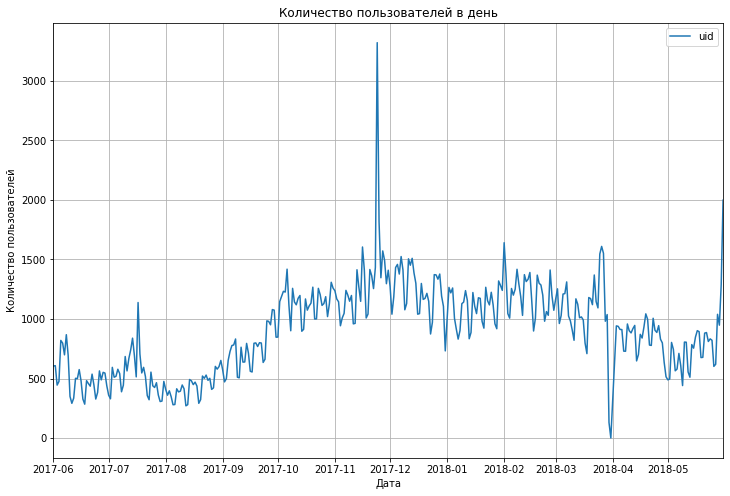

In [32]:
visits.groupby('session_date').agg({'uid':'nunique'}).plot(kind = 'line', 
                grid=True, 
                figsize=(12, 8))
plt.title("Количество пользователей в день")
plt.xlabel("Дата")
plt.ylabel("Количество пользователей")
plt.show()

По графику можно заметить, что активность растет с конца лета, уже начиная с сентября, с приездом людей из отпусков и с изменением погодных условий, когда заканчивается сезон прогулок, люди начинают активнее посещать культурные мероприятия. Также на графике можно заметить резкие скачки, к примеру перед 2017-12, это может быть связано с интересными акциями и премьерами, также резкий спад перед 2018-04, вероятно это поспособствовал технический сбой.

Посчитаем количество уникальных пользователей в неделю(**WAU**):

In [33]:
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean().astype('int')
print('Среднее количество уникальных пользователей в неделю за весь период {} человек'.format(wau_total[0]))

Среднее количество уникальных пользователей в неделю за весь период 5716 человек


Посмотрим визуально на динамику изменения активности по неделям.

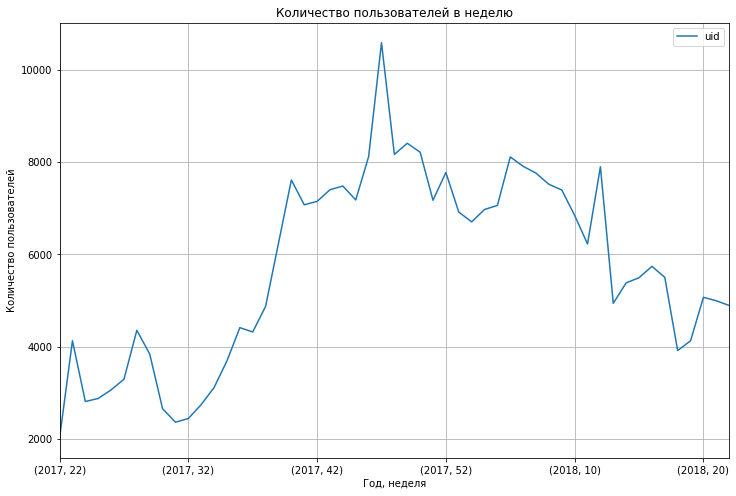

In [34]:
visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).plot(kind = 'line', 
                grid=True, 
                figsize=(12, 8))
plt.title("Количество пользователей в неделю")
plt.xlabel("Год, неделя")
plt.ylabel("Количество пользователей")
plt.show()

Здесь еще более выраженно можно заметить, что в недели выпадающие на после летний период активность пользователей растет. 

Также посчитаем количество уникальных пользователей в месяц(**MAU**):

In [35]:
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean().astype('int')
print('Среднее количество уникальных пользователей в месяц за весь период {} человек'.format(mau_total[0]))

Среднее количество уникальных пользователей в месяц за весь период 23228 человек


Посмотрим визуально на динамику изменения активности по месяцам

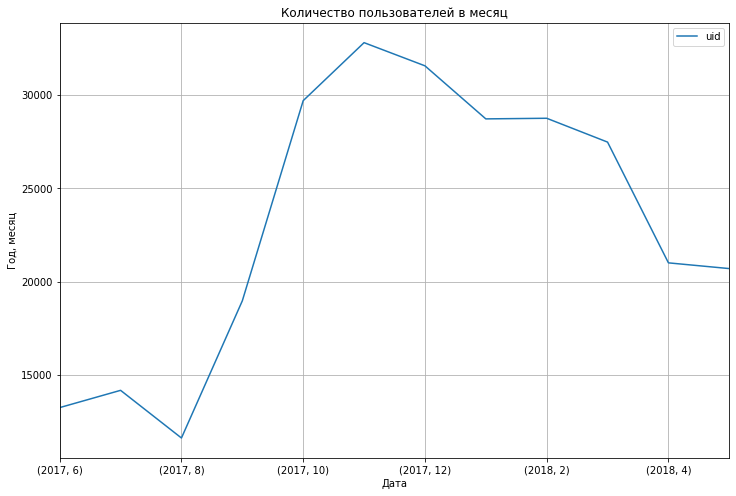

In [36]:
visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).plot(kind = 'line', 
                grid=True, 
                figsize=(12, 8))
plt.title("Количество пользователей в месяц")
plt.xlabel("Дата")
plt.ylabel("Год, месяц")
plt.show()

Данный график еще более подробно демонстирует, что активность растет в более холодное время года, и в сезон, когда люди возвращаются с отпусков. С началом весны, начинается спад активности.

#### 2.1.2 Среднее количество сессий в день, среднее количество сессий в день на пользователя

Создадим сводную таблицу с количеством сессий, количеством уникальных пользователей, а также добавим количество сессий на одного пользователя за каждый день.

In [37]:
sessions_per_user =  visits.groupby('session_date').agg({'uid' : ['count','nunique']}) 
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

Посмотрим на таблицу.

In [38]:
sessions_per_user 

,n_sessions,n_users,sess_per_user
session_date,,,
2017-06-01,664,605,1.10
2017-06-02,658,608,1.08
2017-06-03,477,445,1.07
2017-06-04,510,476,1.07
2017-06-05,893,820,1.09
...,...,...,...
2018-05-27,672,620,1.08
2018-05-28,1156,1039,1.11
2018-05-29,1035,948,1.09


Посчитаем среднее количество сессий в день за весь период, а также среднее количество сессий за весь период.

In [39]:
print('Среднее количество {:.2f} сессий в день за весь период'.format(sessions_per_user['n_sessions'].mean()))
print('Среднее количество {:.2f} сессий в день на одного пользователя за весь период'.format(sessions_per_user['sess_per_user'].mean()))

Среднее количество 987.36 сессий в день за весь период
Среднее количество 1.08 сессий в день на одного пользователя за весь период


Посмотрим на графике динамику изменений посещений в день.

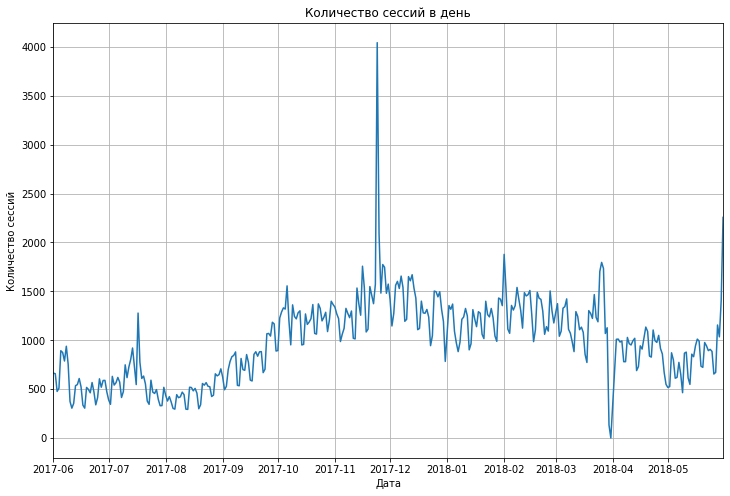

In [40]:
sessions_per_user['n_sessions'].plot(kind = 'line', 
                grid=True, 
                figsize=(12, 8))
plt.title("Количество сессий в день")
plt.xlabel("Дата")
plt.ylabel("Количество сессий")
plt.show()

Ожидаемо, количество сессий коррелирует с количеством уникальных пользователей и здесь мы видим ту же картину, начиная с сентября идет рост активности, достигая своего пика выше 4000 посещений в день, также здесь присуствует спад перед 2018-04.

Также посмотрим визуально как меняется активность в день за весь период на одного пользователя.

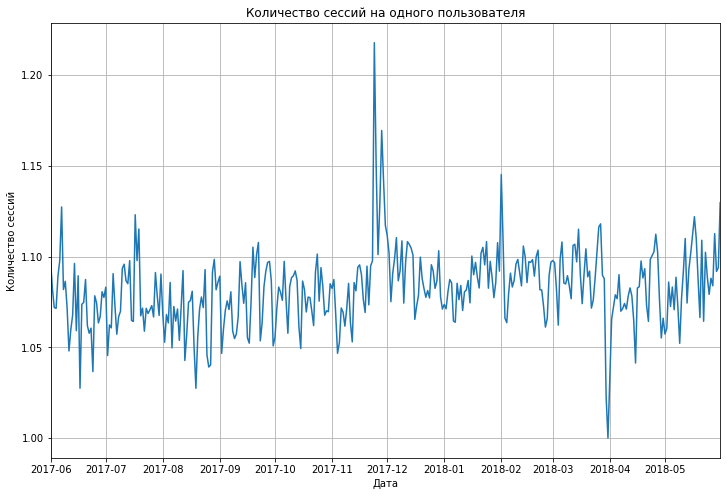

In [41]:
sessions_per_user['sess_per_user'].plot(kind = 'line', 
                grid=True, 
                figsize=(12, 8))
plt.title("Количество сессий на одного пользователя")
plt.xlabel("Дата")
plt.ylabel("Количество сессий")
plt.show()

На графике хорошо заметно, что минимальное количества посещений составляет 1 день. Пик активности также заметень перед 2017-12, достигнув значений свыше 1.2 посещений в день.

#### 2.1.3 Продолжительность пользовательской сессии(**ASL**)

Для начала расчитаем длину всех сессий:

In [42]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

Посмотрим на результат.

In [43]:
visits.sample(10)

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,duration
63580,desktop,2017-06-20 17:43:00,3,2017-06-20 17:40:00,11916001252478106717,2017,6,25,2017-06-20,180
216751,desktop,2018-02-26 22:40:00,3,2018-02-26 22:39:00,5746163599179838012,2018,2,9,2018-02-26,60
294364,desktop,2017-10-12 17:56:00,3,2017-10-12 17:53:00,11780719492195316726,2017,10,41,2017-10-12,180
63903,desktop,2018-01-16 20:44:00,4,2018-01-16 20:42:00,1108921397671141531,2018,1,3,2018-01-16,120
212433,desktop,2017-09-07 18:23:00,3,2017-09-07 18:20:00,4980088877057826028,2017,9,36,2017-09-07,180
136310,desktop,2018-05-03 13:26:00,2,2018-05-03 13:14:00,13405147649137020210,2018,5,18,2018-05-03,720
306568,desktop,2018-02-26 19:43:00,3,2018-02-26 19:10:00,13623198955784574087,2018,2,9,2018-02-26,1980
63277,desktop,2018-02-25 17:47:00,1,2018-02-25 17:46:00,13505930951433175649,2018,2,8,2018-02-25,60
98772,touch,2018-04-14 21:41:00,4,2018-04-14 21:40:00,3184905134676407213,2018,4,15,2018-04-14,60
3854,touch,2017-11-24 21:25:00,2,2017-11-24 21:25:00,8104092950727635648,2017,11,47,2017-11-24,0


Рассчитаем среднюю продолжительность сессии в минутах :

In [44]:
print('Средняя продолжительность сессии составляет {:.1f} минут'.format(visits['duration'].mean()/60))

Средняя продолжительность сессии составляет 10.7 минут


Посмотрим на распределение:

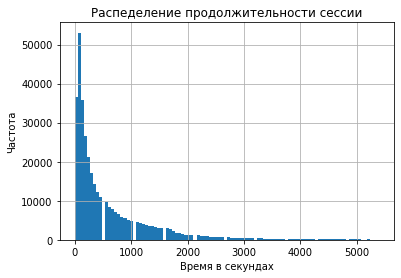

In [45]:
visits['duration'].hist(bins = 100,range = (0,5400))
plt.title('Распеделение продолжительности сессии')
plt.ylabel('Частота')
plt.xlabel('Время в секундах')
plt.show()

Так как наше распределение не близко к нормальному, то необходимо расчитать моду.

In [46]:
visits['duration'].mode()

0    60
dtype: int64

Наиболее часто встречающее значение времени это 0 и 60 секунд. Такой результат можно объяснить тем, что пользователи случайно переходят по рекламе и сразу выходят, кто-то сразу выходит, кто-то успевает немного познакомиться с информацией, прежде чем выйти. Также это время можно объяснить переходом на оплату с партнерских сайтов.

#### 2.1.4 Retention Rate

Возьмём дату, когда пользователь впервые проявил активность:

In [47]:
first_visits = visits.groupby('uid')['start_ts'].min()

Изменим название.

In [48]:
first_visits.name = 'first_start_ts'

Объединим две таблицы в новую в переменную **visits_new**:

In [49]:
visits_new = visits.merge(first_visits, on = 'uid')

Рассчитаем Retention Rate:

In [50]:
visits_new['first_start_ts'] = visits_new['first_start_ts'].astype('datetime64[M]')
visits_new['session_month'] = visits_new['start_ts'].astype('datetime64[M]')
visits_new['cohort_lifetime'] = visits_new['session_month'] - visits_new['first_start_ts']
visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'] / np.timedelta64(1,'M')
visits_new['cohort_lifetime'] = visits_new['cohort_lifetime'].round().astype('int')

cohorts_ret = (visits_new
                       .groupby(['first_start_ts', 'cohort_lifetime'])
                       .agg({'uid': 'nunique'})
                       .reset_index()
          )

init_users_count = cohorts_ret[cohorts_ret['cohort_lifetime']==0][['first_start_ts', 'uid']]
init_users_count = init_users_count.rename(columns={'uid': 'cohort_users'})

cohorts_ret = cohorts_ret.merge(init_users_count, on='first_start_ts')
cohorts_ret['retention'] = cohorts_ret['uid']/cohorts_ret['cohort_users']

retention_pivot_rel = cohorts_ret.pivot_table(index='first_start_ts', columns='cohort_lifetime',
                                      values='retention', aggfunc='sum')
retention_pivot_rel = retention_pivot_rel.reset_index()
retention_pivot_rel['first_start_ts'] = retention_pivot_rel['first_start_ts'].dt.strftime('%Y-%m')
retention_pivot_rel = retention_pivot_rel.set_index('first_start_ts')


Визуализируем Retention Rate с помощью тепловой карты:

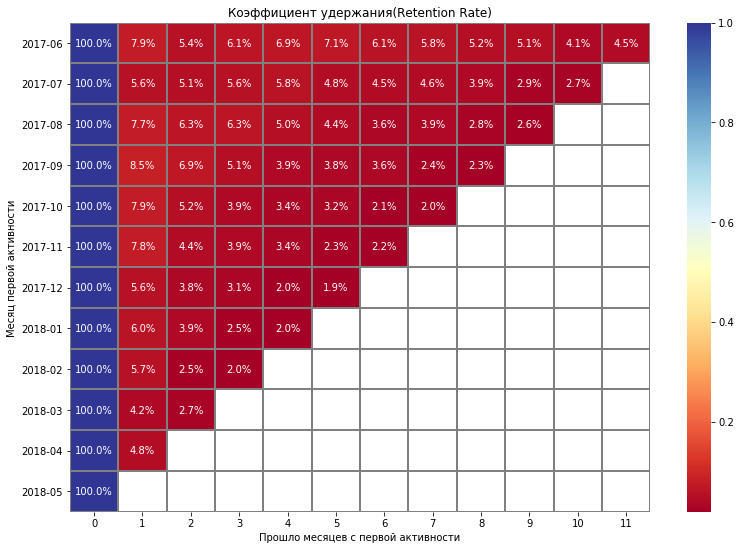

In [51]:
plt.figure(figsize=(13, 9))
plt.title('Коэффициент удержания(Retention Rate)')
sns.heatmap(retention_pivot_rel,  annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap = 'RdYlBu')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первой активности')
plt.show()

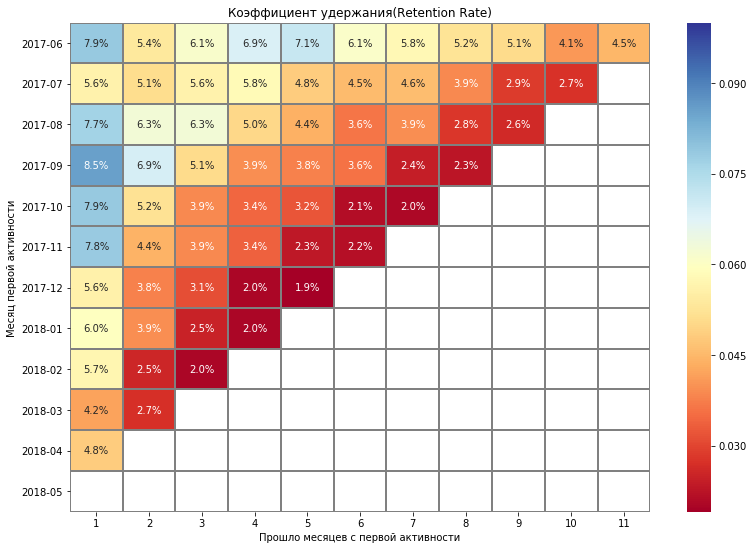

In [52]:
plt.figure(figsize=(13, 9))
plt.title('Коэффициент удержания(Retention Rate)')
sns.heatmap(retention_pivot_rel[[1,2,3,4,5,6,7,8,9,10,11]],  annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax= 0.1, cmap = 'RdYlBu')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первой активности')
plt.show()

Как видно из тепловой карты, начиная со второго месяца пользователи возвращаются редко. Посмотрим средний retention rate на второй месяц:

In [53]:
print('Cредний retention rate на второй месяц когорты составляет {:.2%}'.format(retention_pivot_rel[1].mean()))

Cредний retention rate на второй месяц когорты составляет 6.52%


Довольно мало, объяснение этому можно дать тем, что большинство людей переходят по рекламе, оставляя след в нашем анализе, некоторые попадают на акции и потом уходят. Начиная со второго месяца уже можно зафиксировать пользователей, которые действительно намерены пользоваться продуктом.

### 2.2 Маркетинговые метрики

#### 2.2.1 Среднее время с момента первого посещения сайта до момента покупки

Для начала создадим таблицу с первой датой посещения:

In [54]:
visits_first = visits.groupby('uid').agg({'start_ts': 'min'})

In [55]:
visits_first.columns = ['first_activity']

Создадим таблицу с первым заказом:

In [56]:
orders_first = orders.groupby('uid').agg({'buy_ts': 'min'})

In [57]:
orders_first.columns= ['first_buy_ts']

Объединим таблицы:

In [58]:
orders_first = pd.merge(visits_first, orders_first, on = 'uid')

Создадим столбец с разницой по времени, с момента первой активности.

In [59]:
orders_first['bought_ts'] = (orders_first['first_buy_ts'] - orders_first['first_activity']) / np.timedelta64(1, 'm')

Посмотрим чему равно среднее значение, медианное значение и мода :

In [60]:
print('Среднее значение составляет {:.0f} минут или {:.0f} дней'.format(orders_first['bought_ts'].mean(), orders_first['bought_ts'].mean()/60/24))
print('Медианное значение составляет {} минут'.format(int(orders_first['bought_ts'].median())))
print('Мода составляет {} минута'.format(int(orders_first['bought_ts'].mode()[0])))

Среднее значение составляет 24340 минут или 17 дней
Медианное значение составляет 16 минут
Мода составляет 1 минута


Посмотрим визуально на распределение:

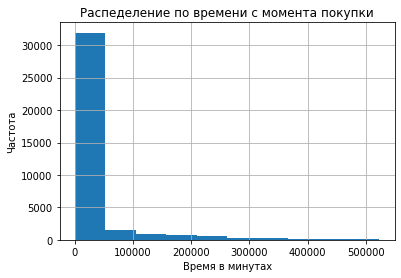

In [61]:
orders_first['bought_ts'].hist()
plt.title('Распеделение по времени с момента покупки')
plt.ylabel('Частота')
plt.xlabel('Время в минутах')
plt.show()

Данная гистограмма отчетливо показывает, что в основная часть расположена до 50000 минут, также обратим внимание, что встрчеются покупки через год, с момента первой активности.

Посмотрим на распределение в другом масштабе:

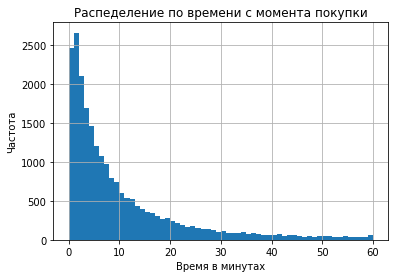

In [62]:
orders_first['bought_ts'].hist(bins = 60, range = (0,60))
plt.title('Распеделение по времени с момента покупки')
plt.ylabel('Частота')
plt.xlabel('Время в минутах')
plt.show()

Если посмотреть в масштабе до 60 минут, то можно обратить внимание что самое встречающееся время это минута,также встречается время, выраженное 0 минутами, это можно объяснить тем, что активность проходит на сайте партнера, а транзакции отмечаются на сайте. Но в целом распределение отчетливо показывает, что процесс покупки с момента первой активности происходит до 20 минут. 

#### 2.2.2 Среднее количество покупок на одного покупателя за определённый период

Объединим **orders** и **orders_first** и создадим столбцы с первым месяцем активности и первым первым месяцем покупки, а также месяцем, днем, неделей, годом покупки :

In [63]:
orders = orders.join(orders_first, on='uid')
orders['first_buy_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['first_session_month'] = orders['first_activity'].astype('datetime64[M]')
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['buy_date'] = orders['buy_ts'].dt.date
orders['buy_week'] = orders['buy_ts'].dt.week
orders['buy_year'] = orders['buy_ts'].dt.year

Распределим количество покупок по когортам, за день, неделю, месяц, год:

In [64]:
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'buy_ts':'count'})
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'buy_ts':'count'})
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'buy_ts':'count'})
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'buy_ts':'count'})


Посмоторим сколько покупок приходится на одного пользователя:

In [65]:
print('Среднее количество покупок на одного пользователя в день {:.2f}:'.format(day_purchases_per_user.mean()[0]))
print('Среднее количество покупок на одного пользователя в неделю {:.2f}:'.format(week_purchases_per_user.mean()[0]))
print('Среднее количество покупок на одного пользователя в месяц {:.2f}:'.format(month_purchases_per_user.mean()[0]))
print('Среднее количество покупок на одного пользователя в год {:.2f}:'.format(year_purchases_per_user.mean()[0]))

Среднее количество покупок на одного пользователя в день 1.08:
Среднее количество покупок на одного пользователя в неделю 1.16:
Среднее количество покупок на одного пользователя в месяц 1.23:
Среднее количество покупок на одного пользователя в год 1.32:


Сделаем когортный анализ по количеству покупок на человека по месяцам с первой сессии. Для начала посчитаем lifetime заказов.

In [66]:
orders['lifetime_orders'] = ((orders['buy_month'] - orders['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')


Сгруппируем заказы по когортам и lifetime и высчитаем количество покупок и пользователей

In [67]:
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_orders']).agg({'uid':['count', 'nunique']}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_orders', 'n_orders', 'n_users']

Получим количество заказов на одного пользователя по каждой когорте и каждому lifetime

In [68]:
orders_grouped_by_cohorts['orders_per_user'] = orders_grouped_by_cohorts['n_orders'] / orders_grouped_by_cohorts['n_users']
orders_grouped_by_cohorts['first_session_month'] = orders_grouped_by_cohorts['first_session_month'].dt.strftime('%Y-%m')

создадим сводную таблицу с когортным анализом количества заказов на пользователя 

In [69]:
cohorts = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_orders', values = 'orders_per_user', aggfunc = 'mean')
cohorts['mean'] = cohorts.mean(axis=1)

Посмотрим на все визуально.

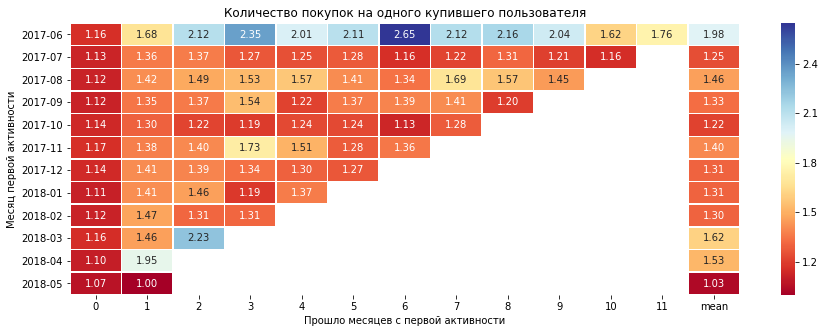

In [70]:
plt.figure(figsize=(15, 5))
plt.title('Количество покупок на одного купившего пользователя')
sns.heatmap(cohorts, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlBu')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности')
plt.show()


Во втором месяце у когорт растет среднее количество покупок, за исключением 2018-05.  Наиболее сильно выделяется первая когорта 2017-06. Также посмотрим на среднее значение по всем когортам за пол года.

In [71]:
print('Среднее значение покупок за 6 месяцев: {:.2f}'.format(cohorts[[0,1,2,3,4,5]].mean().mean()))

Среднее значение покупок за 6 месяцев: 1.41


#### 2.2.3 Средний чек

Сделаем группировку по месяцам с количеством и суммой выручки:

In [72]:
revenue_per_month = orders.groupby(['buy_month']).agg({'bought_ts': 'count', 'revenue': 'sum'}).reset_index()

Переимениуем столбцы :

In [73]:
revenue_per_month.columns = ['order_month', 'n_orders', 'total_revenue']

Посчитаем среднее по месяцам:

In [74]:
revenue_per_month['mean_revenue'] = revenue_per_month['total_revenue'] / revenue_per_month['n_orders']

Посмотрим на таблицу со средним чеком по всем месяцам:

In [75]:
revenue_per_month

,order_month,n_orders,total_revenue,mean_revenue
0,2017-06-01,2354,"9,557.49",4.06
1,2017-07-01,2363,"12,539.47",5.31
2,2017-08-01,1807,"8,758.78",4.85
3,2017-09-01,3387,"18,345.51",5.42
4,2017-10-01,5679,"27,987.70",4.93
5,2017-11-01,5659,"27,069.93",4.78
6,2017-12-01,6218,"36,388.60",5.85
7,2018-01-01,4721,"19,417.13",4.11
8,2018-02-01,5281,"25,560.54",4.84
9,2018-03-01,5326,"28,834.59",5.41


In [76]:
print('Среднее значение среднего чека по всем месяцам составляет {:.2f} у.е.'.format(revenue_per_month['mean_revenue'].mean()))

Среднее значение среднего чека по всем месяцам составляет 4.84 у.е.


Посмотрим визуально на изменение среднего чека по месяцам:

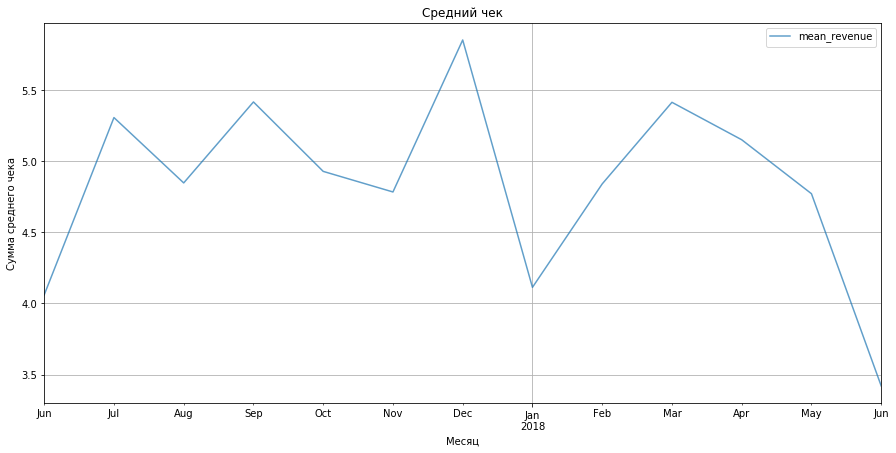

In [77]:
revenue_per_month.plot(kind='line', x='order_month', y='mean_revenue', alpha=0.7, title='Средний чек',  figsize=(15, 7), grid=True,)
plt.ylabel('Сумма среднего чека')
plt.xlabel('Месяц')
plt.show()

Можно заметить что наибольший чек в декабре - 5.85 у.е, это неудивительно, перед новогодним ажиотажом, люди берут билеты на интересные мероприятия. После, в январе можно заметить резкий спад, средний чек января составляет - 4.11 у.е. 

#### 2.2.4 LTV

Рассчитаем возраст кагорты и посчитаем LTV:

In [78]:
orders['age_cohort'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohort_sizes_ltv = orders.groupby('first_buy_month').agg({'uid':'nunique'})
cohort_sizes_ltv.columns = ['cohort_size']
orders_grouped_by_cohorts_ltv = orders.groupby(['first_buy_month', 'age_cohort']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(cohort_sizes_ltv, on='first_buy_month')
orders_grouped_by_cohorts_ltv['ltv'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv['revenue_per_user'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['uid']
ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)


Посмотрим на **LTV** на тепловом снимке:

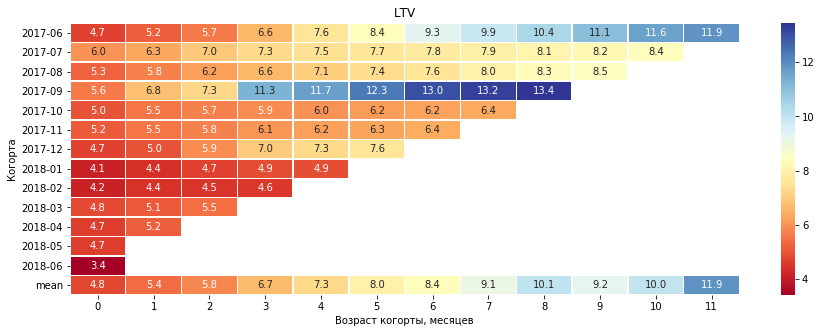

In [79]:
plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.5, cmap = 'RdYlBu')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

Когорты 2017 года имеют более высокий LTV. Когорта 2017-06 выдяелся стабильным LTV. Также можно отметить когорту 2017-09, которая на 3 месяце жизни сделала резкий скачок и выбилась в лидеры на 6 месяце жизни. 

In [80]:
print('Cредний LTV по когортам за 6 месяцев, «проживших» не менее 6 месяцев составляет 8.4 у.е.')

Cредний LTV по когортам за 6 месяцев, «проживших» не менее 6 месяцев составляет 8.4 у.е.


In [81]:
print('Cредний LTV по когортам за 6 месяцев, «проживших» не менее 6 месяцев составляет', ltv.loc['mean'][6])

Cредний LTV по когортам за 6 месяцев, «проживших» не менее 6 месяцев составляет 8.39


### 2.3 Маркетинговые метрики

#### 2.3.1 Общая сумма расходов на маркетинг

Посчитаем сколько суммарно было потрачено на маркетинг:

In [82]:
print('Всего на маркетинг израсходовано {} у.е. '.format(costs['costs'].sum()))

Всего на маркетинг израсходовано 329131.62 у.е. 


Посмотрим суммарные затраты по каналам:

In [83]:
chanel_costs = costs.groupby('source_id').agg({'costs' : 'sum'})
chanel_costs

,costs
source_id,
1,"20,833.27"
2,"42,806.04"
3,"141,321.63"
4,"61,073.60"
5,"51,757.10"
9,"5,517.49"
10,"5,822.49"


Посмотрим также визуально в процентном соотношении от сумарных затрах по всем каналам:

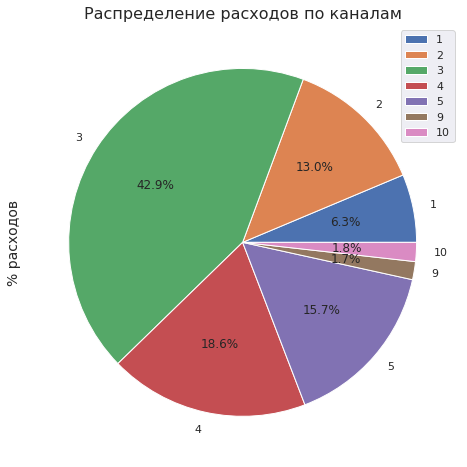

In [84]:
sns.set(style="darkgrid")
chanel_costs.plot.pie(subplots=True, figsize=(12, 8),autopct='%.1f%%')
plt.ylabel('% расходов', fontsize=14)
plt.title('Распределение расходов по каналам', fontsize=16)
plt.show()

Основой канал расходов - 3 , его доля составляет 42.9% по сумарным затратам всех каналов. На втором месте - 4 канал с 18.6 %, замыкает тройку - 5 канал с 15.7% . Меньше всего тратится на 9 канал, его доля составляет 1.7% .

Посмотрим как меняются расходы со временем. Добавим столбец с месяцом:

In [85]:
costs['cost_month'] = costs['dt'].astype('datetime64[M]')

Посмотрим визуально как менялись затрамы со временем:

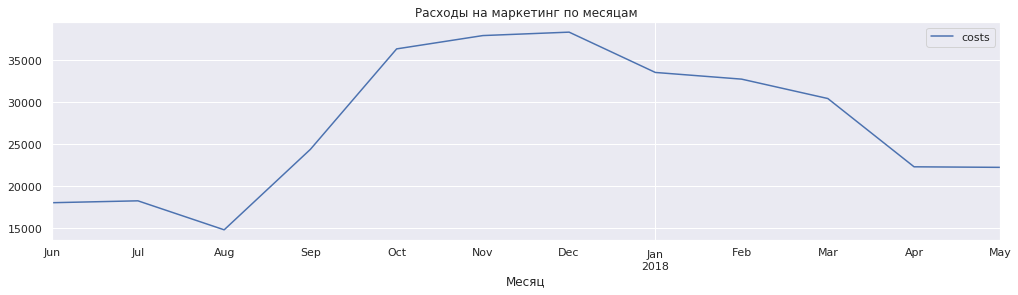

In [86]:
costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(title = 'Расходы на маркетинг по месяцам', figsize = (17,4))
plt.xlabel('Месяц')
plt.show()

С Августа месяц растут затраты на маркетинг. С Октрбря и до конца Декабря самый пик. С Марта начинается снижение затрат на маркетин. Посмотрим также расходы по каналам:

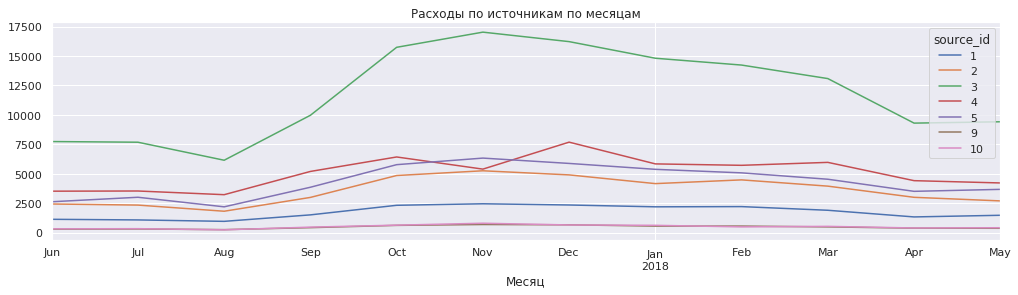

In [87]:

costs_pivot = costs.pivot_table(index = 'cost_month', columns = 'source_id', values = 'costs', aggfunc = 'sum')
costs_pivot.plot(figsize = (17,4), title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

Самый затратный 3 канал и это по всем месяцам. 4 канал идет на втором месте, лишь в Ноябре устуив 5 каналу. 10 канал самый низкозатраный и это по всем месяцам.

#### 2.3.2 Средний CAC

Создадим таблицу, с месяцем затрат и с рекламным источником по затратам :

In [88]:
costs_months = costs.groupby(['cost_month','source_id'])[['costs']].sum().reset_index()

Отчетливо видим в каком месяцем каким каналом привлечения было израсходовано денежных средств

In [89]:
costs_months

,cost_month,source_id,costs
0,2017-06-01,1,"1,125.61"
1,2017-06-01,2,"2,427.38"
2,2017-06-01,3,"7,731.65"
3,2017-06-01,4,"3,514.80"
4,2017-06-01,5,"2,616.12"
...,...,...,...
79,2018-05-01,3,"9,411.42"
80,2018-05-01,4,"4,214.21"
81,2018-05-01,5,"3,669.56"
82,2018-05-01,9,362.17


Ранее для LTV мы создавали таблицу, вспомним ее:

In [90]:
orders_grouped_by_cohorts_ltv

,first_buy_month,age_cohort,revenue,uid,cohort_size,ltv,revenue_per_user
0,2017-06-01,0,"9,557.49",2023,2023,4.72,4.72
1,2017-06-01,1,981.82,61,2023,0.49,16.10
2,2017-06-01,2,885.34,50,2023,0.44,17.71
3,2017-06-01,3,"1,931.30",54,2023,0.95,35.76
4,2017-06-01,4,"2,068.58",88,2023,1.02,23.51
...,...,...,...,...,...,...,...
74,2018-03-01,2,"1,114.87",58,3533,0.32,19.22
75,2018-04-01,0,"10,600.69",2276,2276,4.66,4.66
76,2018-04-01,1,"1,209.92",69,2276,0.53,17.54
77,2018-05-01,0,"13,925.76",2988,2988,4.66,4.66


Объединим таблицы :

In [91]:
report_news = orders_grouped_by_cohorts_ltv.merge(costs_months, left_on='first_buy_month', right_on='cost_month')

Рассчитаем столбец с CAC : 

In [92]:
report_news['cac'] = report_news['costs'] / report_news['cohort_size']

In [94]:
print('Cредний СAC для всего проекста составляет {:.3f} у.е. '.format(costs['costs'].sum() / orders['uid'].nunique()))

Cредний СAC для всего проекста составляет 9.012 у.е. 


Создадим таблицу по первому месяцу покупки:

In [95]:
monthly_orders = orders.groupby('first_buy_month').agg({'uid': 'nunique'}).reset_index()

Создадим таблицу по суммарным затратам в месяц:

In [96]:
monthly_costs = costs.groupby(['cost_month','source_id']).agg({'costs' : 'sum'}).reset_index()

Объединим таблицы :

In [97]:
monthly = pd.merge(monthly_costs, monthly_orders, left_on = 'cost_month', right_on = 'first_buy_month')

Рассчитаем месячный CAC:

In [98]:
monthly['cac'] = monthly['costs'] / monthly ['uid']

Создадим таблицу с месяцем и CAC:

In [99]:
cac = monthly.groupby('cost_month')['cac'].sum().reset_index()

Посмотрим наглядно :

In [100]:
cac

,cost_month,cac
0,2017-06-01,8.91
1,2017-07-01,9.49
2,2017-08-01,10.80
3,2017-09-01,9.44
4,2017-10-01,8.37
5,2017-11-01,9.29
6,2017-12-01,8.74
7,2018-01-01,9.94
8,2018-02-01,8.96
9,2018-03-01,8.61


Также посмотрим визуально:

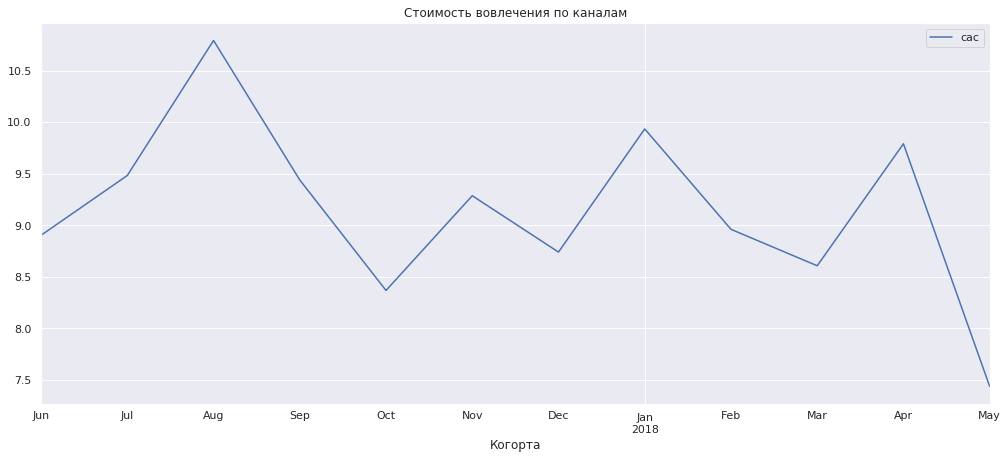

In [101]:
cac_monthly = cac.pivot_table(
    index='cost_month', 
    values='cac', 
    aggfunc='mean')
cac_monthly.plot(kind='line', grid=True, figsize=(17, 7), title = 'Стоимость вовлечения по каналам')
plt.xlabel('Когорта')
plt.show()

C Июня 2017 года по Август 2017 года видим рост CAC до уровня 10.8 у.е, это пиковые значения. Минимальное значение наблюдается в Мае 2018 года, средний уровень СAC Мая 2018 года составляет 7.44 у.е. 

Посмотрим визуально на изменения:

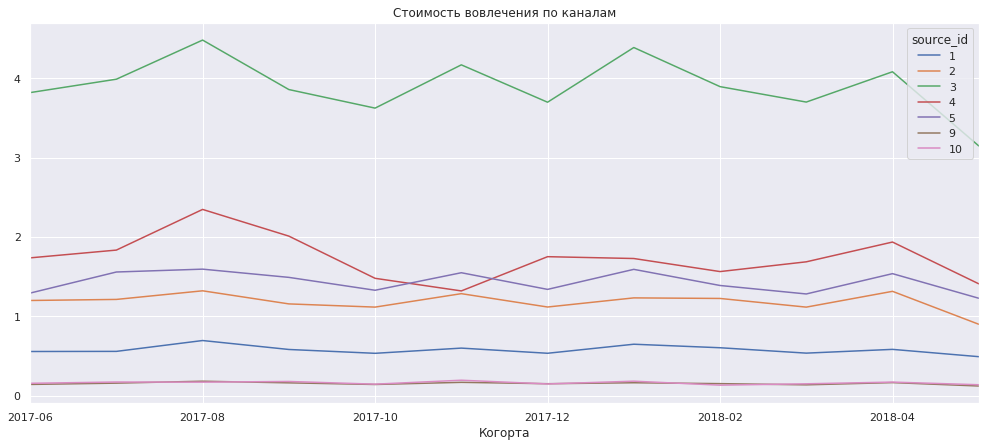

In [102]:
report_news['first_buy_month'] = report_news['first_buy_month'].dt.strftime('%Y-%m')
cac_pivot = report_news.pivot_table(
    index='first_buy_month', 
    columns='source_id', 
    values='cac', 
    aggfunc='mean')
cac_pivot.plot(kind='line', grid=True, figsize=(17, 7), title = 'Стоимость вовлечения по каналам')
plt.xlabel('Когорта')
plt.show()

По времени:

In [103]:
cac

,cost_month,cac
0,2017-06-01,8.91
1,2017-07-01,9.49
2,2017-08-01,10.80
3,2017-09-01,9.44
4,2017-10-01,8.37
5,2017-11-01,9.29
6,2017-12-01,8.74
7,2018-01-01,9.94
8,2018-02-01,8.96
9,2018-03-01,8.61


Посмотрим визуально:

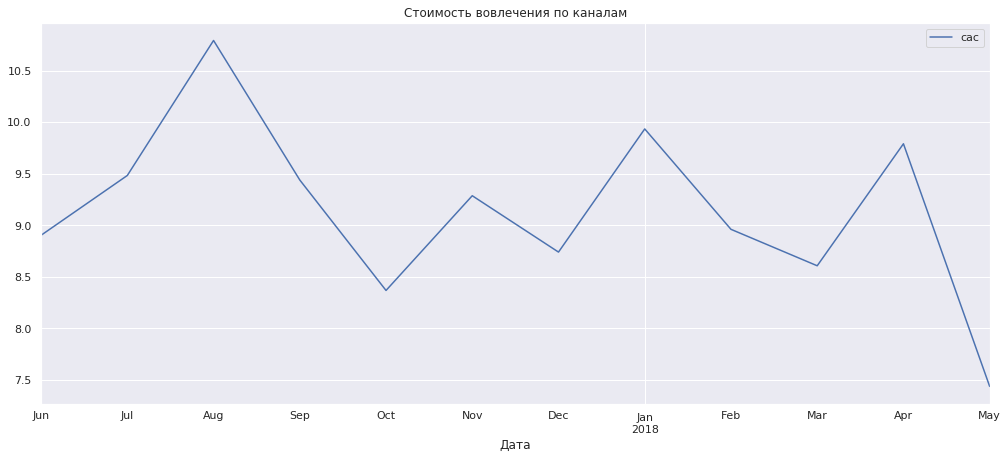

In [104]:
cac.pivot_table(
    index='cost_month', 
    values='cac', 
    aggfunc='mean').plot(kind='line', grid=True, figsize=(17, 7), title = 'Стоимость вовлечения по каналам')
plt.xlabel('Дата')
plt.show()

Также посмотрим на cac по каналам :

In [105]:
chanel_cac = monthly.groupby('source_id')['cac'].sum().reset_index()
chanel_cac

,source_id,cac
0,1,6.92
1,2,14.20
2,3,46.88
3,4,20.81
4,5,17.19
5,9,1.83
6,10,1.93


Также посмотрим на cac в завимисомотси от месяца и канала:

In [106]:
cac_ch_mon = monthly.groupby(['cost_month', 'source_id'])['cac'].sum().reset_index()
cac_ch_mon

,cost_month,source_id,cac
0,2017-06-01,1,0.56
1,2017-06-01,2,1.20
2,2017-06-01,3,3.82
3,2017-06-01,4,1.74
4,2017-06-01,5,1.29
...,...,...,...
79,2018-05-01,3,3.15
80,2018-05-01,4,1.41
81,2018-05-01,5,1.23
82,2018-05-01,9,0.12


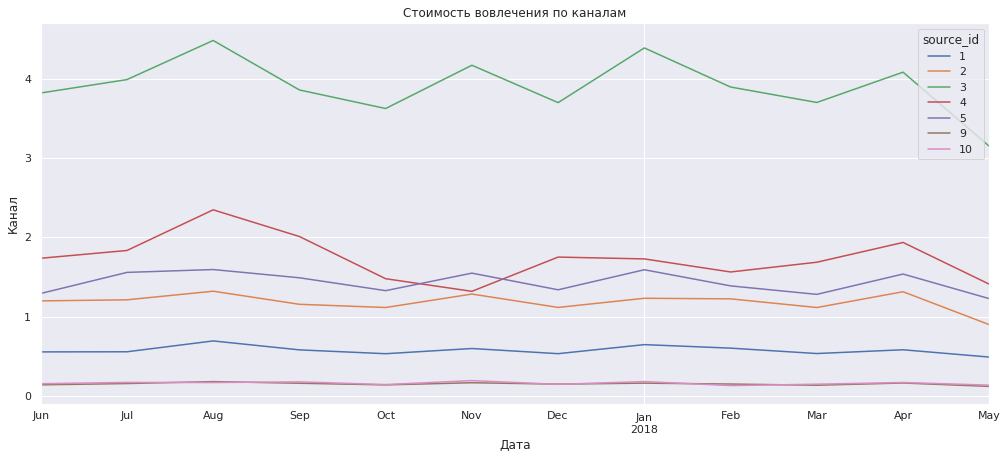

In [107]:
cac_ch_mon.pivot_table(
    index='cost_month',
    columns = 'source_id',
    values='cac', 
    aggfunc='mean').plot(kind='line', grid=True, figsize=(17, 7), title = 'Стоимость вовлечения по каналам')
plt.xlabel('Дата')
plt.ylabel('Канал')
plt.show()

Создадим сводную таблицу для тепловой карты 

In [108]:
cac_ch_mon['cost_month'] = cac_ch_mon['cost_month'].dt.strftime('%Y-%m')
cac_map = cac_ch_mon.pivot_table(index = 'cost_month', columns = 'source_id',values = 'cac')
cac_map.loc['mean'] = cac_map.mean()

Посмотрим на тепловую карту: 

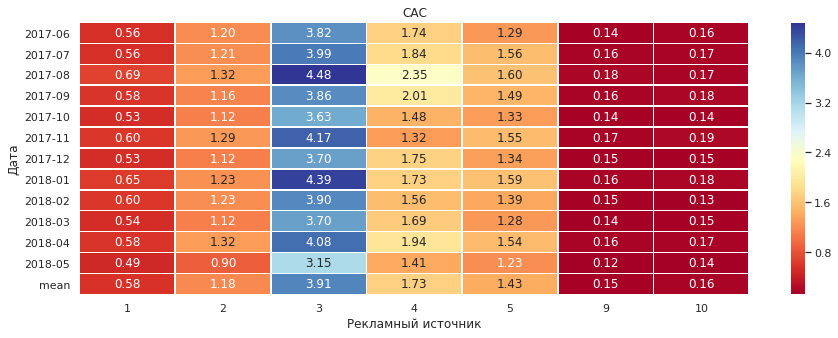

In [109]:
plt.figure(figsize=(15, 5))
plt.title('CAC')
sns.heatmap(cac_map, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlBu')
plt.xlabel('Рекламный источник')
plt.ylabel('Дата')
plt.show()

Проанализирова тепловую карту можно сделать вывод, что самый большой средний CAC у 3 источника - 3.91 у.е. Cледом идут 4 канал с 1.73 у.е и 5 канал с 1.43 у.е, Наименьший CAC у 10 канала - 0.16 у.е и у 9 канал - 0.15 у.е.

Также посмотрим на CAC на тепловом снимке:

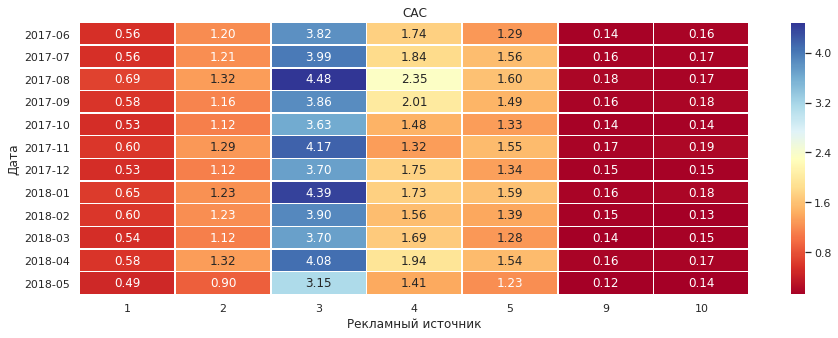

In [110]:
plt.figure(figsize=(15, 5))
plt.title('CAC')
sns.heatmap(cac_pivot, annot=True, fmt=".2f", linewidths=.5, cmap = 'RdYlBu')
plt.xlabel('Рекламный источник')
plt.ylabel('Дата')
plt.show()

Самый дорогой канал привлечения - 3, за ним идет 4 и 5 каналы. Самые дешевые каналы это 9 и 10. 

#### 2.3.3 ROMI

Добавим в столбец расчеты с ROMI:

In [111]:
report_news['romi'] = report_news['ltv'] / report_news['cac']


Создадим тепловую карту:

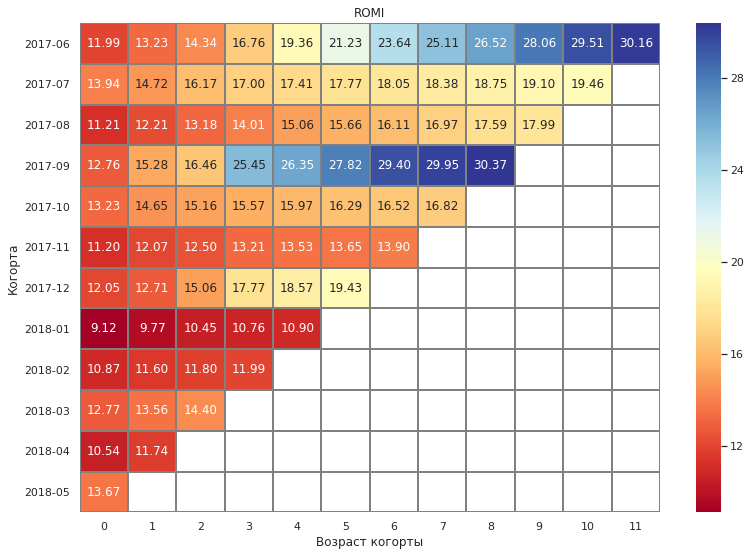

In [112]:
romi_pivot = report_news.pivot_table(
        index='first_buy_month', 
        columns='age_cohort', 
        values='romi', 
        aggfunc='mean').cumsum(axis=1).round(2)



sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(romi_pivot, 
            annot=True, 
            fmt='.2f', 
            linewidths=1, 
            linecolor='gray',cmap = 'RdYlBu')
plt.xlabel('Возраст когорты')
plt.ylabel('Когорта')
plt.show()

Пока ни одна когорта в целом не окупилась. Наиболее перспективные когорты 2017-06 и 2017-09, Январская, Февральская и Апрельская когорты за 2018 годы, наименее перспективны.

Посмотрим сколько потратил купивший пользователь:

In [113]:
user_revenue = orders.groupby('uid').agg({'revenue': 'sum'}).reset_index()

Определим из какого канала пришел пользователь:

In [114]:
user_chanel = visits.groupby('uid')['source_id'].first().reset_index()

Объединим таблицы:

In [115]:
user_chanel_revenue = pd.merge(user_revenue,user_chanel, on ='uid', how = 'left')

Посчитаеем Общую прибыль по каждому каналу :

In [116]:
chanel_revenue = user_chanel_revenue.groupby('source_id').agg({'revenue': 'sum'})

Посчитаем количество пользователей привлеченных каналами :

In [117]:
chanel_users = user_chanel_revenue.groupby('source_id').agg({'uid': 'count'})

Объединим таблицы

In [118]:
finish = pd.merge(chanel_revenue, chanel_users, on ='source_id').reset_index()

Посчитаем LTV для каждого канала :

In [119]:
finish['ltv'] = finish['revenue'] / finish['uid']

In [120]:
finish

,source_id,revenue,uid,ltv
0,1,"38,560.06",3743,10.30
1,2,"65,152.26",4323,15.07
2,3,"44,317.68",9138,4.85
3,4,"52,479.75",9823,5.34
4,5,"40,357.91",6839,5.90
5,7,1.22,1,1.22
6,9,"7,076.98",1415,5.00
7,10,"4,111.34",1241,3.31


Объединим таблицы LTV с CAC

In [121]:
finish = pd.merge(finish, chanel_cac, on = 'source_id' )

Найдем ROMI Для каждого канала :

In [122]:
finish['romi'] = finish['ltv'] / finish['cac']
finish[['source_id','romi']]

,source_id,romi
0,1,1.49
1,2,1.06
2,3,0.10
3,4,0.26
4,5,0.34
5,9,2.73
6,10,1.72


Romi для 9, 10, ,1 , 2 канала окупается.  Для остальных нет. 

## Этап 3. Выводы

* Стоить обратить внимание на 3 источник привлечения, так как он самый дорогой.  9 и 10 источники по стомости привлечения самые дешевые.
* Во втором месяце у когорт растет среднее количество покупок.
* Когорты 2017 года имеют более высокий LTV. Когорта 2017-06 выдяелся стабильным LTV. Также можно отметить когорту 2017-09, которая на 3 месяце жизни сделала резкий скачок и выбилась в лидеры на 6 месяце жизни
* Пока ни одна когорта в целом не окупилась. Наиболее перспективные когорты 2017-06 и 2017-09, Январская, Февральская и Апрельская когорты за 2018 годы, наименее перспективны.

Проделав данную работу, можно смело заявить, что бизнес в среднем привлекат клиента на 1 раз, лишь постоянные клиенты пользуются приложением и со временем. На маркетинг тратится 329131.62 у.е., и на данный момент, ни один из каналов не окупился. Имеется всплекс активности и заинтересованности в покупках в после летний период, в частиности перед Новым Годом наблюдается "Бум", в летний же период, пользователи ни так активны, это можно объяснить тем, что центр развлечений у людей смеещается в другой вектор, к примеру в вектор путешествия людей, где любители культурного досуга уже не могут использовать возможность покупки, если говорить про заграничные путевки. Также интересен тот момент, что мода времени покупки составляет одну минуту, это можно объяснить тем, что люди сразу выбирают нужный им спектакль, пьессу или иной другой досуг, и им остается лишь произвести оплату. 